In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('../../data/cars_clean.csv')

In [ ]:
#sanity checks
print(df.head())
print(df.tail())
print(df.shape)
print(df.size)
print(df.info())
print(df.describe())

   Unnamed: 0  symboling  normalized-losses         make fuel-type aspiration  \
0           0          3                122  alfa-romero       gas        std   
1           1          3                122  alfa-romero       gas        std   
2           2          1                122  alfa-romero       gas        std   
3           3          2                164         audi       gas        std   
4           4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  ...  engine-size  \
0          two  convertible          rwd           front  ...          130   
1          two  convertible          rwd           front  ...          130   
2          two    hatchback          rwd           front  ...          152   
3         four        sedan          fwd           front  ...          109   
4         four        sedan          4wd           front  ...          136   

   fuel-system  bore  stroke  compression-ra

In [ ]:
#correlations
df.corr(numeric_only = True)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


In [ ]:
#find the correlation among a subset of columns
df[['length', 'width', 'curb-weight', 'engine-size', 'wheel-base']].corr(numeric_only = True)

,length,width,curb-weight,engine-size,wheel-base
length,1.000000,0.857170,0.880665,0.685025,0.876024
width,0.857170,1.000000,0.866201,0.729436,0.814507
curb-weight,0.880665,0.866201,1.000000,0.849072,0.782097
engine-size,0.685025,0.729436,0.849072,1.000000,0.572027
wheel-base,0.876024,0.814507,0.782097,0.572027,1.000000


(0.0, 53395.487022781446)

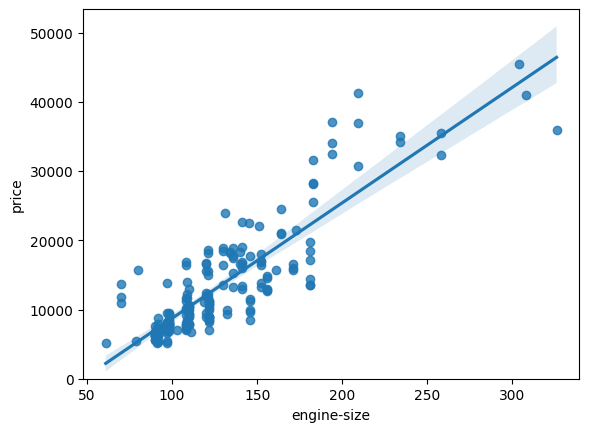

In [ ]:
#seaborn to make visuals

sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0)

<Axes: xlabel='highway-mpg', ylabel='price'>

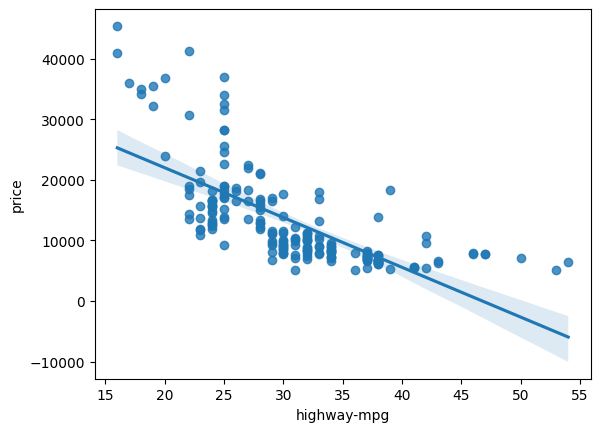

In [ ]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)

In [ ]:
df.describe(include = ['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


<Axes: xlabel='drive-wheels', ylabel='price'>

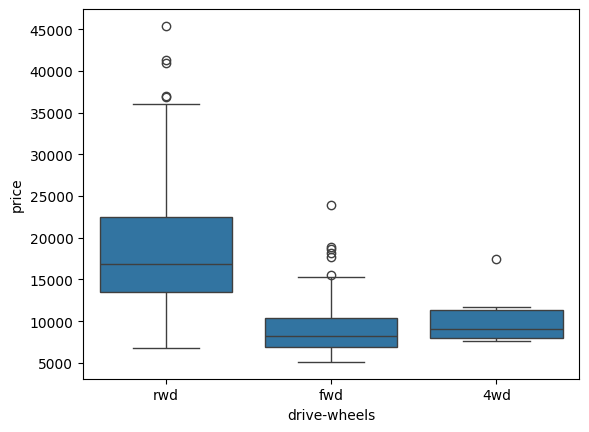

In [ ]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

<Axes: xlabel='body-style', ylabel='price'>

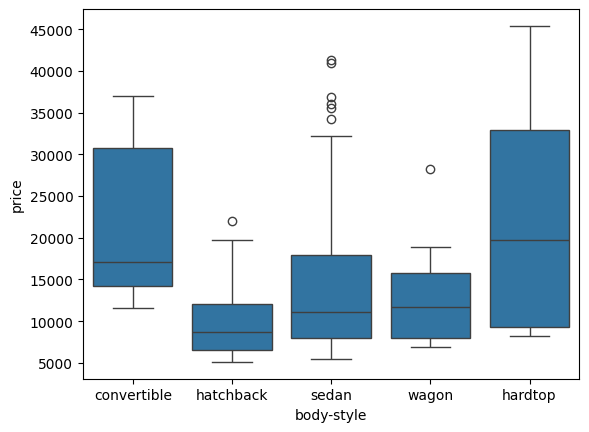

In [ ]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

<Axes: xlabel='engine-location', ylabel='price'>

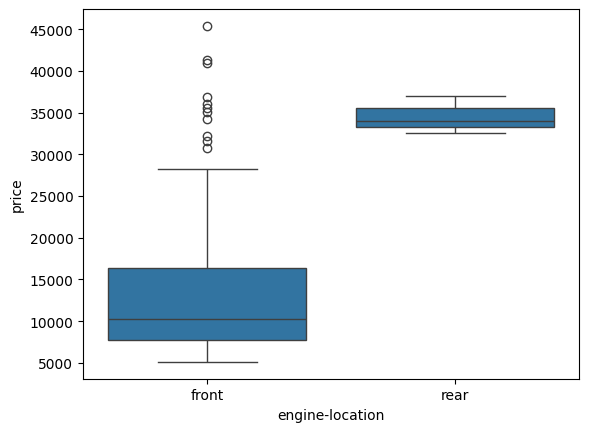

In [ ]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'alfa-romero'),
  Text(0, 1, 'audi'),
  Text(0, 2, 'bmw'),
  Text(0, 3, 'chevrolet'),
  Text(0, 4, 'dodge'),
  Text(0, 5, 'honda'),
  Text(0, 6, 'isuzu'),
  Text(0, 7, 'jaguar'),
  Text(0, 8, 'mazda'),
  Text(0, 9, 'mercedes-benz'),
  Text(0, 10, 'mercury'),
  Text(0, 11, 'mitsubishi'),
  Text(0, 12, 'nissan'),
  Text(0, 13, 'peugot'),
  Text(0, 14, 'plymouth'),
  Text(0, 15, 'porsche'),
  Text(0, 16, 'renault'),
  Text(0, 17, 'saab'),
  Text(0, 18, 'subaru'),
  Text(0, 19, 'toyota'),
  Text(0, 20, 'volkswagen'),
  Text(0, 21, 'volvo')])

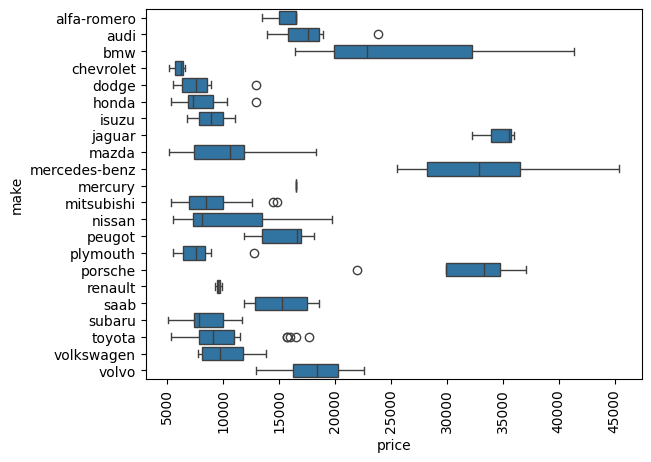

In [ ]:
sns.boxplot(x = 'price', y = 'make', data = df)
#rotate label if too long
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:
#descriptive statistical analysis
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#convert to dataframe

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns = {'drive-wheels': 'drive_wheels_counts'}, inplace = True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#grouping data

group_1 = df[['make', 'price']]
group_1

grouped_mean_1 = group_1.groupby(['make'], as_index = False).mean()
grouped_mean_1

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


In [ ]:
# create another group
group_2 = df[['drive-wheels', 'engine-location', 'price']]
group_2

grouped_mean_2 = group_2.groupby(['drive-wheels', 'engine-location'], as_index = False).mean()
grouped_mean_2

,drive-wheels,engine-location,price
0,4wd,front,10241.000000
1,fwd,front,9244.779661
2,rwd,front,19142.180556
3,rwd,rear,34528.000000


In [ ]:
#Pivoting the table
grouped_pivot_1 = grouped_mean_2.pivot(index = 'drive-wheels', columns = 'engine-location')
grouped_pivot_1 = grouped_pivot_1.fillna(0)
grouped_pivot_1

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      0.0
fwd               9244.779661      0.0
rwd              19142.180556  34528.0

In [ ]:
#restructure table
grouped_pivot_2 = grouped_mean_2.pivot(index = 'engine-location', columns = 'drive-wheels')
grouped_pivot_2 = grouped_pivot_2.fillna(0)
grouped_pivot_2

price                           
drive-wheels         4wd          fwd           rwd
engine-location                                    
front            10241.0  9244.779661  19142.180556
rear                 0.0     0.000000  34528.000000

In [ ]:
#p-values
#the probability that assuming the null hypothesis is true, we obtain a test statistic at least as extereme as the results we observed

# p-value < 0.001, strong evidence that the correlation coefficient is statistically significant
# p-value the probability that the correlation coefficient is statistically significant
# p-value < 0.05, there is moderate evidence that the correlation coefficient is statistically significant
# p-value < 0.1, there is weak evidence that the correlation coefficient is statistically significant, or no evidence at all

In [ ]:
#import the stats library
from scipy import stats

In [ ]:
#computer the correlation coefficient and the p-value
p_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The Pearson Correlation Coefficient is', p_coef, 'with a P-value of P =', p_value)

The Pearson Correlation Coefficient is 0.8723351674455184 with a P-value of P = 9.265491622198827e-64


In [ ]:
#analysis of variance (ANOVA)
#Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups.
#ANOVA returns two parameters
# F-test score
# P-value
# If our price is strongly correlated with the variable that we are anlayzing, then we will expect that ANOVA will return a large F-test score and a small p-value


In [ ]:
#check group 2
print(group_2)

    drive-wheels engine-location  price
0            rwd           front  13495
1            rwd           front  16500
2            rwd           front  16500
3            fwd           front  13950
4            4wd           front  17450
..           ...             ...    ...
196          rwd           front  16845
197          rwd           front  19045
198          rwd           front  21485
199          rwd           front  22470
200          rwd           front  22625

[201 rows x 3 columns]


In [ ]:
#make another group
group_3 = df[['body-style', 'price']]
grouped_drive_wheels = group_2[['drive-wheels', 'price']].groupby(['drive-wheels'], as_index = False)
mean_price_by_drive_wheels = grouped_drive_wheels.mean()
mean_price_by_drive_wheels

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
grouped_drive_wheels.get_group(('4wd',))['price']

,price
4,17450
136,7603
140,9233
141,11259
144,8013
145,11694
150,7898
151,8778


In [ ]:
# Perform ANOVA on the grouped data
f_val, p_val = stats.f_oneway(grouped_drive_wheels.get_group(('4wd',))['price'],
                              grouped_drive_wheels.get_group(('fwd',))['price'],
                              grouped_drive_wheels.get_group(('rwd',))['price'])

print("ANOVA results: F-value =", f_val, ", P-value =", p_val)

ANOVA results: F-value = 67.95406500780398 , P-value = 3.3945443577151245e-23


In [ ]:
## linear regression model
#y = a + b * x

In [ ]:
#import libraries
from sklearn.linear_model import LinearRegression

In [ ]:
#create the linear regression object
lm = LinearRegression()

In [ ]:
#set up our input parameters for the Linear Regression Model
X = df[['engine-size']]
Y = df['price']

In [ ]:
# fit the linear model
lm.fit (X,Y)

LinearRegression()

In [ ]:
#print the intercept
print('The intercept is', lm.intercept_)

The intercept is -7963.338906281042


In [ ]:
print(lm.coef_)

[166.86001569]


In [ ]:
print(lm.intercept_)

-7963.338906281042


In [ ]:
#print the slope of the coefficient
print('The slope of the coefficient is', lm.coef_)

The slope of the coefficient is [166.86001569]


In [ ]:
# Our linear regression model is y = 166.86001569x -7963.338906281042
# price = -7963.338 + 166.86 * engine-size

(0.0, 53199.696197855905)

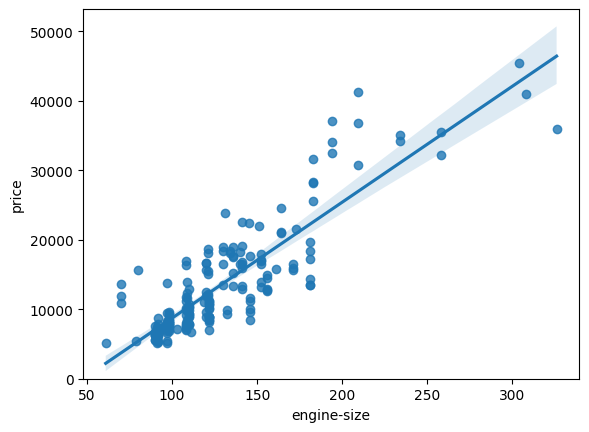

In [ ]:
#visual check
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0)

<Axes: xlabel='engine-size', ylabel='price'>

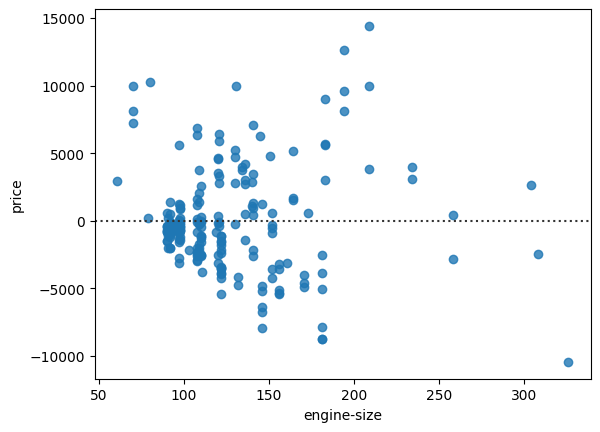

In [ ]:
#create a residual plot
sns.residplot(x=df['engine-size'], y=df['price'])

In [ ]:
#coefficient of determination
#compute the coefficient of determination

In [ ]:
#compute the coefficient of determination
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [ ]:
# multiple linear regression

In [ ]:
#define other parameters
z= df[['engine-size', 'curb-weight']]

In [ ]:
#create the model
lm.fit(z, Y)

LinearRegression()

In [ ]:
#compute the coefficient of determination
print('The R-square is: ', lm.score(z, Y))

The R-square is:  0.7924548499107636
